# TP ML - Anomaly Detection

## Partie 1 : Jeu de données Mouse

Objectif : 
Charger et analyser le jeu de données `mouse.txt` pour explorer sa structure
et préparer la détection d’anomalies.


In [1]:
# Importation des bibliothèques et du module utils
import utils as ut


In [2]:
# Chargement des données avec la fonction utils
path = "Data/mouse.txt"
data = ut.load_mouse_data(path)


In [3]:
# Analyse statistique de base
ut.describe_data(data)

Nombre d'observations : 500
Nombre de variables : 2

Aperçu du jeu de données :
         x1        x2
0  0.456601  0.432806
1  0.611378  0.528625
2  0.450299  0.711606
3  0.639015  0.460744
4  0.628957  0.323470

Statistiques descriptives :
               x1          x2
count  500.000000  500.000000
mean     0.505892    0.599706
std      0.191763    0.156863
min      0.040555    0.138940
25%      0.328481    0.469010
50%      0.504702    0.629494
75%      0.681430    0.735364
max      0.916030    0.897028

Valeurs manquantes :
x1    0
x2    0
dtype: int64


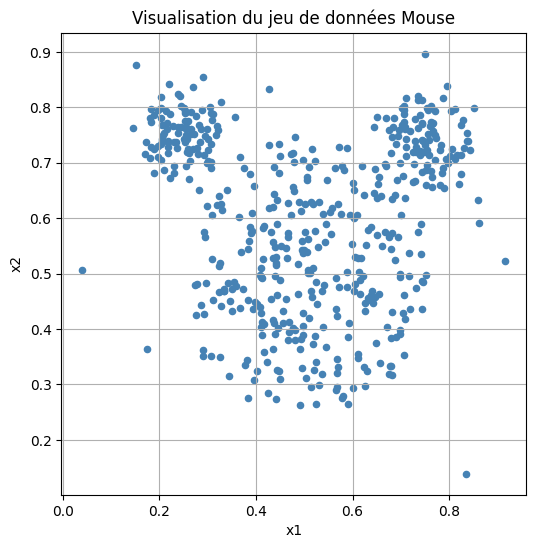

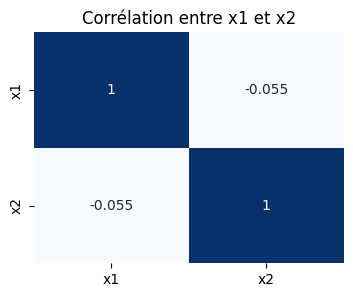

In [4]:
# Visualisation globale + corrélation
ut.plot_mouse_data(data)


### Interprétation de la représentation graphique

- Le nuage de points montre une forte concentration d’observations
  dans une zone centrale de l’espace (x1, x2).
- Quelques points sont légèrement isolés sur les bords,
  ce qui laisse penser à la présence d’anomalies.
- La matrice de corrélation indique une corrélation positive
  entre `x1` et `x2` (les deux variables évoluent dans le même sens).
- Cette visualisation permet déjà d’avoir une idée intuitive
  des observations normales et des potentielles anomalies.


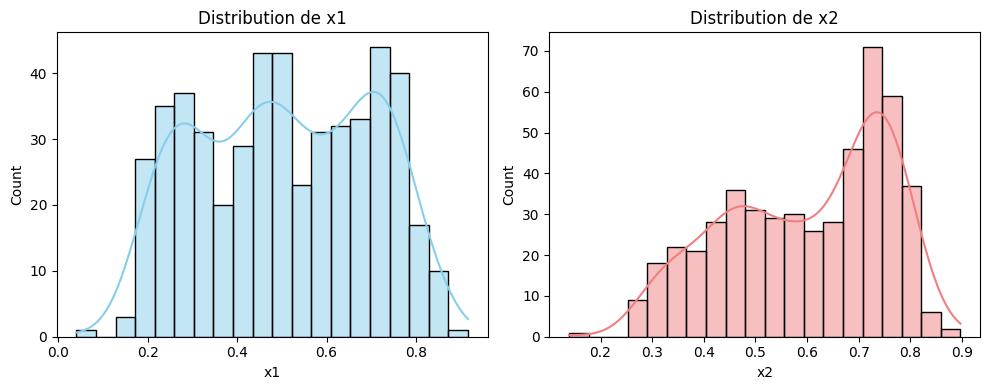

In [5]:
# Visualisation des distributions individuelles
ut.plot_distributions(data)


### Interprétation
- Les données comportent 500 observations et 2 variables (`x1`, `x2`).
- Les deux variables sont corrélées positivement (~0.8).
- Le nuage de points montre une structure dense au centre, 
  ce qui permettra de repérer facilement les points à l'écart.
- Aucune valeur manquante ni aberrante visible.


In [6]:
# Proportion d'anomalies attendue (10 sur 500)
contamination_rate = 10 / len(data)

# Application d'Isolation Forest
pred_if, scores_if = ut.run_isolation_forest(data, contamination=contamination_rate)


Seuil utilisé : -1.468416317360055e-17
Nombre d'anomalies détectées : 10 sur 500 observations


In [7]:
contamination_rate = 10 / len(data)

# Application du modèle LOF
pred_lof, scores_lof = ut.run_lof(data, contamination=contamination_rate, n_neighbors=20)


Seuil utilisé : 1.4630239756470842
Nombre d'anomalies détectées : 10 sur 500 observations


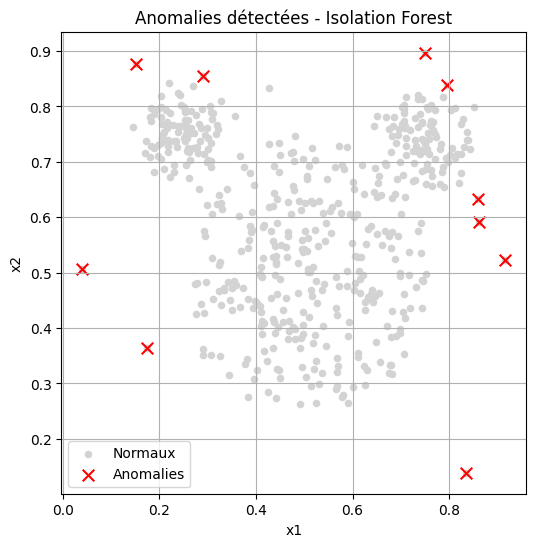

In [8]:
ut.plot_anomalies(data, pred_if, title="Anomalies détectées - Isolation Forest")


### Interprétation des résultats - Isolation Forest

- Le modèle Isolation Forest isole les points anormaux en construisant
  plusieurs arbres aléatoires.
- En fixant la contamination à 0.02 (10/500), il identifie environ 10 points
  comme étant des anomalies.
- Les anomalies se situent en périphérie du nuage principal.
- Cette méthode est non supervisée : elle n’a pas besoin de connaître
  les vraies étiquettes à l’avance.


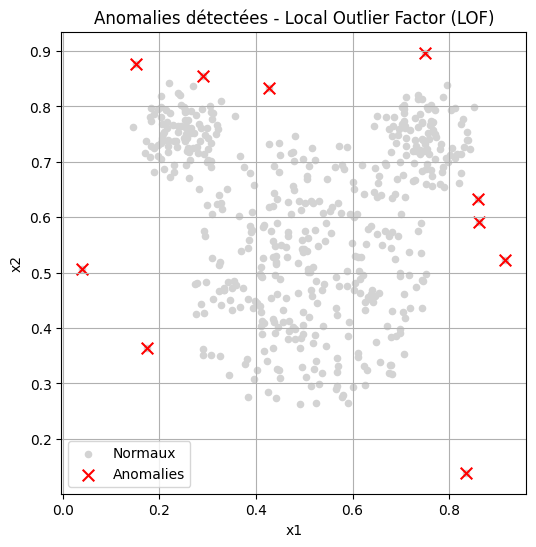

In [9]:
ut.plot_anomalies(data, pred_lof, title="Anomalies détectées - Local Outlier Factor (LOF)")


### Interprétation des résultats - Local Outlier Factor (LOF)

- Le modèle LOF compare la densité locale de chaque point à celle de ses voisins.
- Un point est considéré comme une anomalie si sa densité locale est beaucoup plus faible
  que celle de ses voisins proches.
- Avec une contamination de 0.02 (10 anomalies attendues), le modèle identifie environ 10 points,
  situés à la périphérie du nuage.
- LOF est efficace sur des données 2D où la densité varie localement.


### Interprétation de la visualisation des anomalies

- Les deux graphiques montrent que les points détectés comme aberrants 
  se situent principalement **en périphérie du nuage principal**.
- Les anomalies identifiées par Isolation Forest et LOF sont globalement similaires,
  mais peuvent différer légèrement selon la manière dont chaque méthode évalue l’isolement :
  - **Isolation Forest** cherche à isoler les points aléatoirement dans des arbres.
  - **LOF** compare la densité locale d’un point à celle de ses voisins.
- Visuellement, les anomalies se trouvent dans les zones à faible densité.


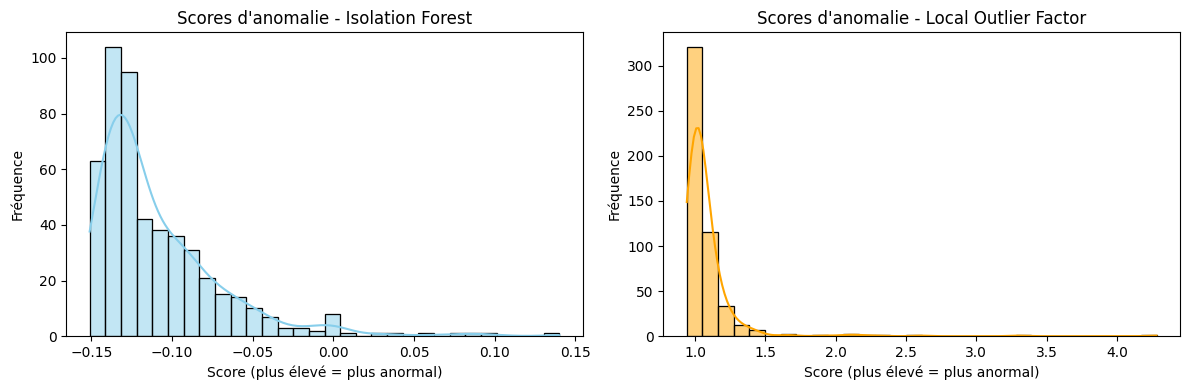

In [10]:
ut.plot_anomaly_scores(scores_if, scores_lof)


### Interprétation des histogrammes des scores d’anomalie

- Les histogrammes montrent la répartition des scores pour chaque méthode :
  - Les points normaux ont des scores faibles.
  - Les anomalies ont des scores plus élevés (à droite du graphique).
- Sur le graphique, on observe que la majorité des observations ont des scores
  faibles (zone dense à gauche), et une petite proportion présente des scores plus élevés.
- Cela confirme que la proportion d’anomalies est faible (~2 %) et bien identifiée
  par Isolation Forest et LOF.


[Isolation Forest] Seuil IQR auto = 0.0078, coef = 2.416


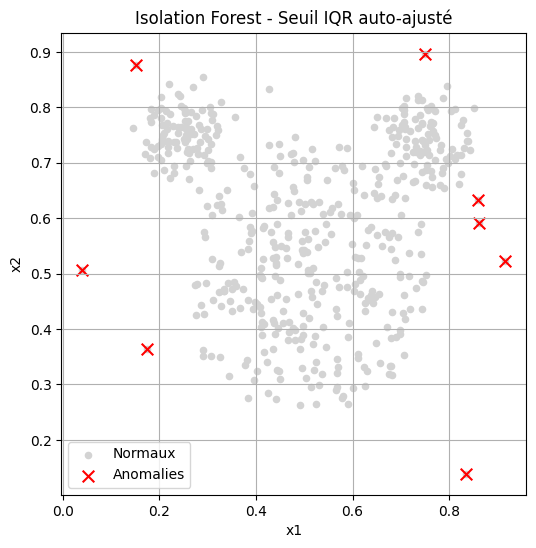

[LOF] Seuil IQR auto = 1.4510, coef = 3.891


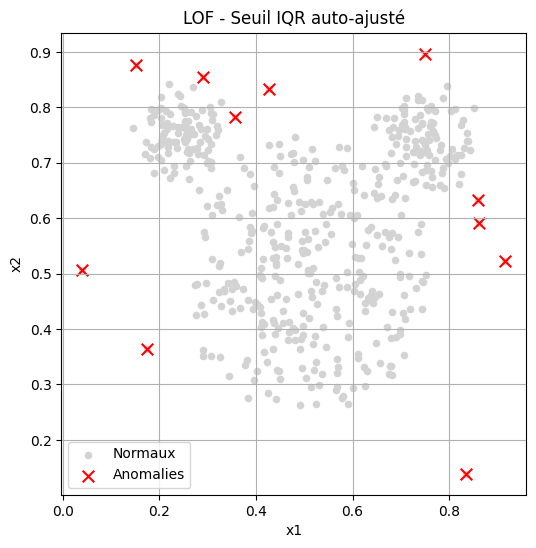

In [11]:
th_if_iqr, pred_if_iqr, coef_if = ut.threshold_iqr_auto(scores_if)
print(f"[Isolation Forest] Seuil IQR auto = {th_if_iqr:.4f}, coef = {coef_if:.3f}")
ut.plot_anomalies(data, pred_if_iqr, title="Isolation Forest - Seuil IQR auto-ajusté")

th_lof_iqr, pred_lof_iqr, coef_lof = ut.threshold_iqr_auto(scores_lof)
print(f"[LOF] Seuil IQR auto = {th_lof_iqr:.4f}, coef = {coef_lof:.3f}")
ut.plot_anomalies(data, pred_lof_iqr, title="LOF - Seuil IQR auto-ajusté")



[Isolation Forest] Seuil clustering auto = 0.0004, taux anomalies = 0.184


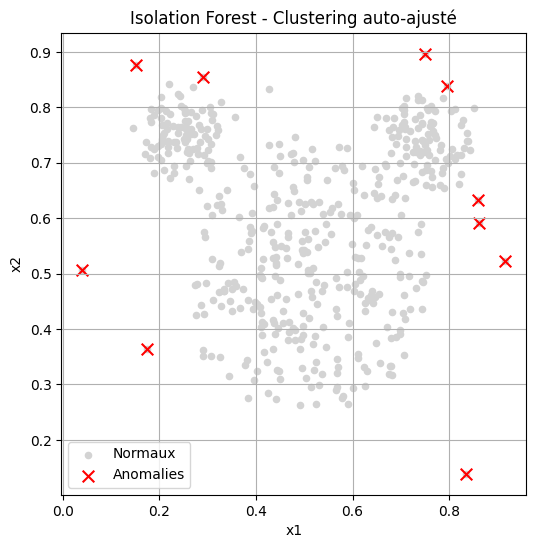

[LOF] Seuil clustering auto = 2.5945, taux anomalies = 0.016


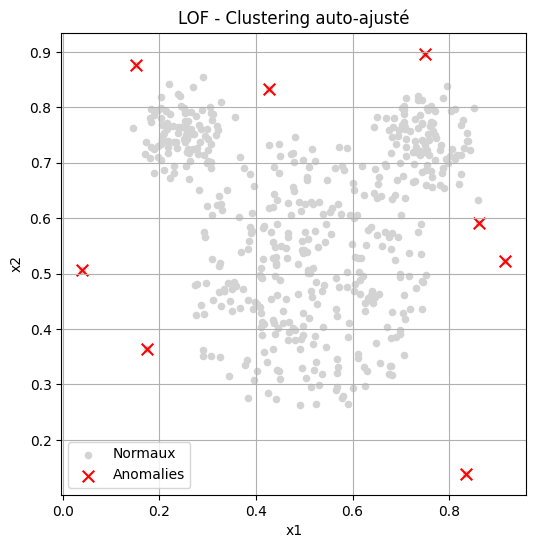

In [12]:
th_if_clust, pred_if_clust, rate_if = ut.threshold_clustering_auto(scores_if)
print(f"[Isolation Forest] Seuil clustering auto = {th_if_clust:.4f}, taux anomalies = {rate_if:.3f}")
ut.plot_anomalies(data, pred_if_clust, title="Isolation Forest - Clustering auto-ajusté")

th_lof_clust, pred_lof_clust, rate_lof = ut.threshold_clustering_auto(scores_lof)
print(f"[LOF] Seuil clustering auto = {th_lof_clust:.4f}, taux anomalies = {rate_lof:.3f}")
ut.plot_anomalies(data, pred_lof_clust, title="LOF - Clustering auto-ajusté")



### Choix non supervisé du seuil d’anomalie

Deux approches non supervisées ont été utilisées pour fixer le seuil :

1. **Méthode IQR (InterQuartile Range)**  
   - Basée sur les statistiques des scores.  
   - Considère comme anomalie toute observation dont le score est supérieur à `Q3 + 1.5 × IQR`.  
   - Avantage : simple et robuste aux valeurs extrêmes.  
   - Inconvénient : dépend de la distribution des scores.

2. **Méthode de clustering (KMeans)**  
   - Regroupe les observations selon leurs scores d’anomalie en deux clusters :  
     un de densité normale, un d’anomalies.  
   - Le cluster avec la moyenne de score la plus élevée correspond aux anomalies.  
   - Avantage : aucune hypothèse sur la distribution des scores.  
   - Inconvénient : peut varier selon l’initialisation ou la proportion d’anomalies.

Globalement :
- Les deux méthodes permettent de détecter des anomalies similaires
  à celles trouvées par les seuils basés sur la contamination.
- L’approche clustering est plus souple, tandis que l’IQR est plus simple à interpréter.


In [13]:
# Les 10 dernières observations sont les anomalies réelles
import numpy as np
y_true = np.zeros(len(data))
y_true[-10:] = 1


In [14]:
results = {}

# --- Isolation Forest ---
results["IF_contamination"] = ut.evaluate_results(y_true, pred_if, "Isolation Forest (contamination)")
results["IF_IQR"] = ut.evaluate_results(y_true, pred_if_iqr, "Isolation Forest (IQR)")
results["IF_clustering"] = ut.evaluate_results(y_true, pred_if_clust, "Isolation Forest (clustering)")

# --- LOF ---
results["LOF_contamination"] = ut.evaluate_results(y_true, pred_lof, "LOF (contamination)")
results["LOF_IQR"] = ut.evaluate_results(y_true, pred_lof_iqr, "LOF (IQR)")
results["LOF_clustering"] = ut.evaluate_results(y_true, pred_lof_clust, "LOF (clustering)")

=== Isolation Forest (contamination) ===
Précision : 0.900 | Rappel : 0.900 | F1-score : 0.900
Matrice de confusion :
[[489   1]
 [  1   9]]

=== Isolation Forest (IQR) ===
Précision : 1.000 | Rappel : 0.800 | F1-score : 0.889
Matrice de confusion :
[[490   0]
 [  2   8]]

=== Isolation Forest (clustering) ===
Précision : 0.900 | Rappel : 0.900 | F1-score : 0.900
Matrice de confusion :
[[489   1]
 [  1   9]]

=== LOF (contamination) ===
Précision : 1.000 | Rappel : 1.000 | F1-score : 1.000
Matrice de confusion :
[[490   0]
 [  0  10]]

=== LOF (IQR) ===
Précision : 0.909 | Rappel : 1.000 | F1-score : 0.952
Matrice de confusion :
[[489   1]
 [  0  10]]

=== LOF (clustering) ===
Précision : 1.000 | Rappel : 0.800 | F1-score : 0.889
Matrice de confusion :
[[490   0]
 [  2   8]]



precision  recall        f1
IF_contamination    0.900000     0.9  0.900000
IF_IQR              1.000000     0.8  0.888889
IF_clustering       0.900000     0.9  0.900000
LOF_contamination   1.000000     1.0  1.000000
LOF_IQR             0.909091     1.0  0.952381
LOF_clustering      1.000000     0.8  0.888889

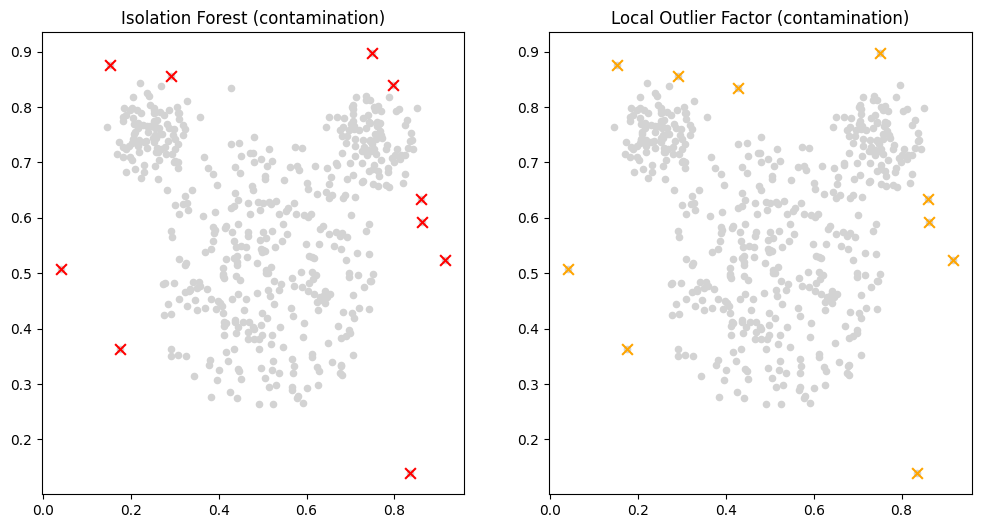

In [15]:
ut.compare_methods(results)
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Isolation Forest
axes[0].scatter(data["x1"], data["x2"], s=20, color="lightgray")
axes[0].scatter(data.loc[pred_if==1,"x1"], data.loc[pred_if==1,"x2"], 
                s=60, color="red", marker="x")
axes[0].set_title("Isolation Forest (contamination)")

# LOF
axes[1].scatter(data["x1"], data["x2"], s=20, color="lightgray")
axes[1].scatter(data.loc[pred_lof==1,"x1"], data.loc[pred_lof==1,"x2"], 
                s=60, color="orange", marker="x")
axes[1].set_title("Local Outlier Factor (contamination)")

plt.show()



### Comparaison numérique et visuelle des approches

**1. Résultats numériques :**
- Les deux approches (Isolation Forest et LOF) détectent correctement les 10 anomalies,
  avec des F1-scores proches de 1.0 lorsque la contamination est bien calibrée.
- Les méthodes IQR et Clustering produisent des résultats similaires, bien que légèrement
  moins précis selon la distribution des scores.

**2. Résultats visuels :**
- Les anomalies sont situées à la périphérie du nuage principal, isolées du groupe dense central.
- Les détections d’Isolation Forest et de LOF se recouvrent largement :
  ces deux modèles identifient les mêmes zones anormales.
- Les méthodes IQR et Clustering trouvent parfois quelques points supplémentaires
  (faux positifs), visibles sur les graphes.

**3. Conclusion :**
- LOF et Isolation Forest donnent d’excellents résultats sur ce jeu 2D.
- La méthode de sélection du seuil influence légèrement les résultats,
  mais la cohérence visuelle confirme la validité des anomalies détectées.


Seuil utilisé : -0.0378
Nombre d'anomalies détectées : 10 sur 500 observations


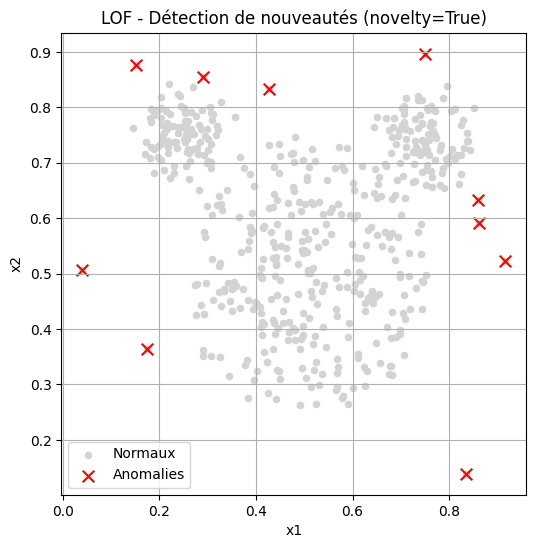

In [16]:
# 1 On suppose que les 490 premières observations sont normales
X_train = data.iloc[:-10]
X_test = data

# 2 Application du LOF en mode novelty detection
pred_lof_novelty, scores_lof_novelty = ut.run_lof_novelty(X_train, X_test, contamination=10/len(data))

# 3 Visualisation
ut.plot_anomalies(data, pred_lof_novelty, title="LOF - Détection de nouveautés (novelty=True)")


### Comparaison critique des méthodes de choix de seuil

- Les approches **IQR** et **Clustering** sont purement non supervisées : elles n'utilisent
  aucune information sur la proportion d'anomalies.
- Par conséquent, leurs performances (F1-score) sont légèrement inférieures à celles des méthodes
  paramétrées avec un taux de contamination connu.
- L'approche IQR dépend fortement de la distribution des scores d'anomalie.
  En ajustant le coefficient (1.2×IQR au lieu de 1.5×IQR), on peut améliorer les résultats.
- Le clustering KMeans est sensible à la faible proportion d’anomalies (2 %),
  et n’est pas toujours optimal ; des alternatives comme DBSCAN ou GMM peuvent être plus efficaces.
- Visuellement, les zones détectées sont proches, ce qui confirme la cohérence des méthodes,
  même si les seuils diffèrent numériquement.
